# Import Library dan Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Dataset status brain stroke berdasarkan variabel-variabel yang mempengaruhi
data = pd.read_csv('brain_stroke.csv')

# Eksplorasi Data

In [3]:
#Menampilkan 5 baris teratas dari dataset
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [4]:
#Menampilkan 5 baris terakhir dari dataset
data.tail()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
4976,Male,41.0,0,0,No,Private,Rural,70.15,29.8,formerly smoked,0
4977,Male,40.0,0,0,Yes,Private,Urban,191.15,31.1,smokes,0
4978,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,31.8,smokes,0
4979,Male,40.0,0,0,Yes,Private,Rural,83.94,30.0,smokes,0
4980,Female,80.0,1,0,Yes,Private,Urban,83.75,29.1,never smoked,0


In [5]:
#Menampilkan ukuran dimensi dari dataset
data.shape

(4981, 11)

In [6]:
#Mengetahui adanya data yang duplikat
data.duplicated().sum()

0

In [7]:
#Mengetahui data yang bernilai kosong
data.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [8]:
#Mengetahui informasi umum dari dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [9]:
data.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,43.419859,0.096165,0.055210,105.943562,28.498173,0.049789
std,22.662755,0.294848,0.228412,45.075373,6.790464,0.217531
min,0.080000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,25.000000,0.000000,0.000000,77.230000,23.700000,0.000000
50%,45.000000,0.000000,0.000000,91.850000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,113.860000,32.600000,0.000000
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.000000


In [10]:
data.nunique()

gender                  2
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               4
Residence_type          2
avg_glucose_level    3895
bmi                   342
smoking_status          4
stroke                  2
dtype: int64

In [11]:
#Mengelompokkan variabel dataset yang berupa kategori
data_cat = data[['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'stroke']]

In [12]:
data_cat

,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,smoking_status,stroke
0,Male,0,1,Yes,Private,Urban,formerly smoked,1
1,Male,0,1,Yes,Private,Rural,never smoked,1
2,Female,0,0,Yes,Private,Urban,smokes,1
3,Female,1,0,Yes,Self-employed,Rural,never smoked,1
4,Male,0,0,Yes,Private,Urban,formerly smoked,1
...,...,...,...,...,...,...,...,...
4976,Male,0,0,No,Private,Rural,formerly smoked,0
4977,Male,0,0,Yes,Private,Urban,smokes,0
4978,Female,1,0,Yes,Govt_job,Rural,smokes,0
4979,Male,0,0,Yes,Private,Rural,smokes,0


In [13]:
#Mengetahui nilai kategori dari tiap variabel
for i in data_cat.columns:
  print(data_cat[i].unique())

['Male' 'Female']
[0 1]
[1 0]
['Yes' 'No']
['Private' 'Self-employed' 'Govt_job' 'children']
['Urban' 'Rural']
['formerly smoked' 'never smoked' 'smokes' 'Unknown']
[1 0]


In [14]:
#Mengetahui frekuensi tiap kategori dari variabel dataset
for i in data_cat.columns:
  print(data_cat[i].value_counts())

Female    2907
Male      2074
Name: gender, dtype: int64
0    4502
1     479
Name: hypertension, dtype: int64
0    4706
1     275
Name: heart_disease, dtype: int64
Yes    3280
No     1701
Name: ever_married, dtype: int64
Private          2860
Self-employed     804
children          673
Govt_job          644
Name: work_type, dtype: int64
Urban    2532
Rural    2449
Name: Residence_type, dtype: int64
never smoked       1838
Unknown            1500
formerly smoked     867
smokes              776
Name: smoking_status, dtype: int64
0    4733
1     248
Name: stroke, dtype: int64


## Visualisasi Data

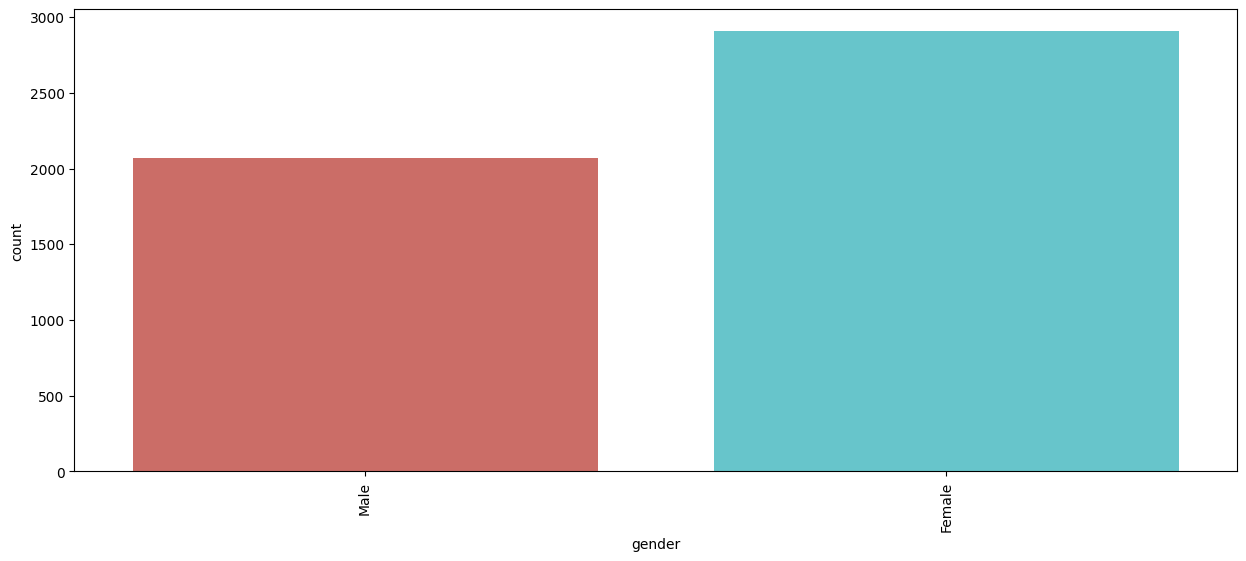

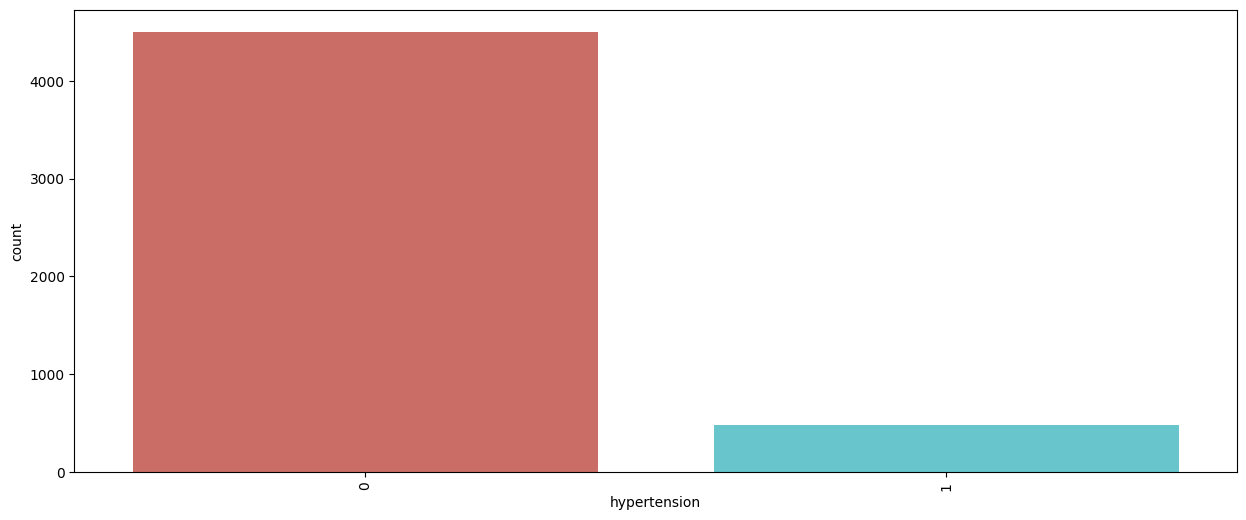

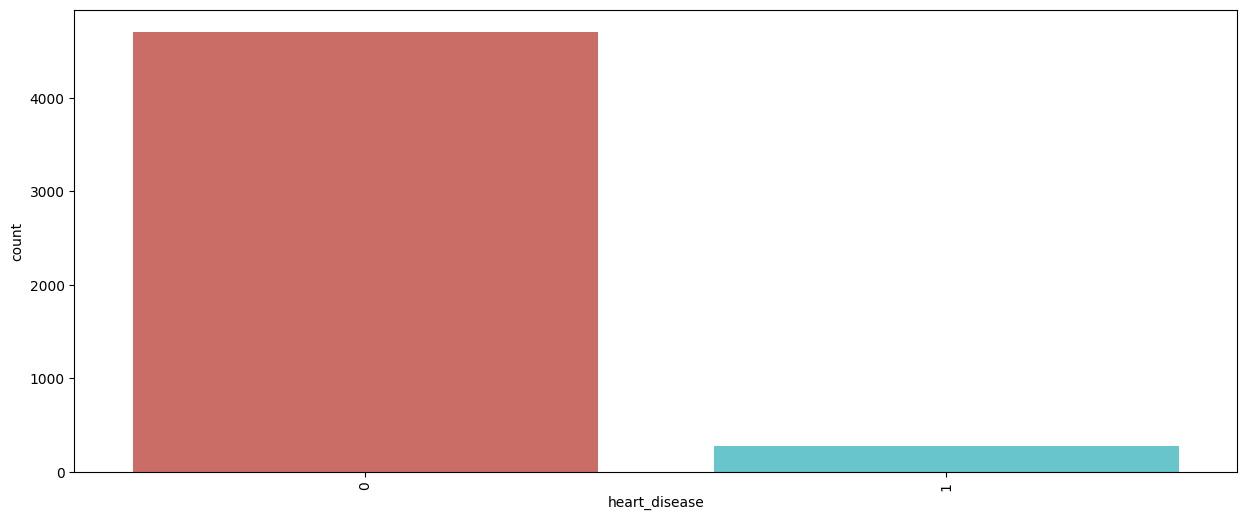

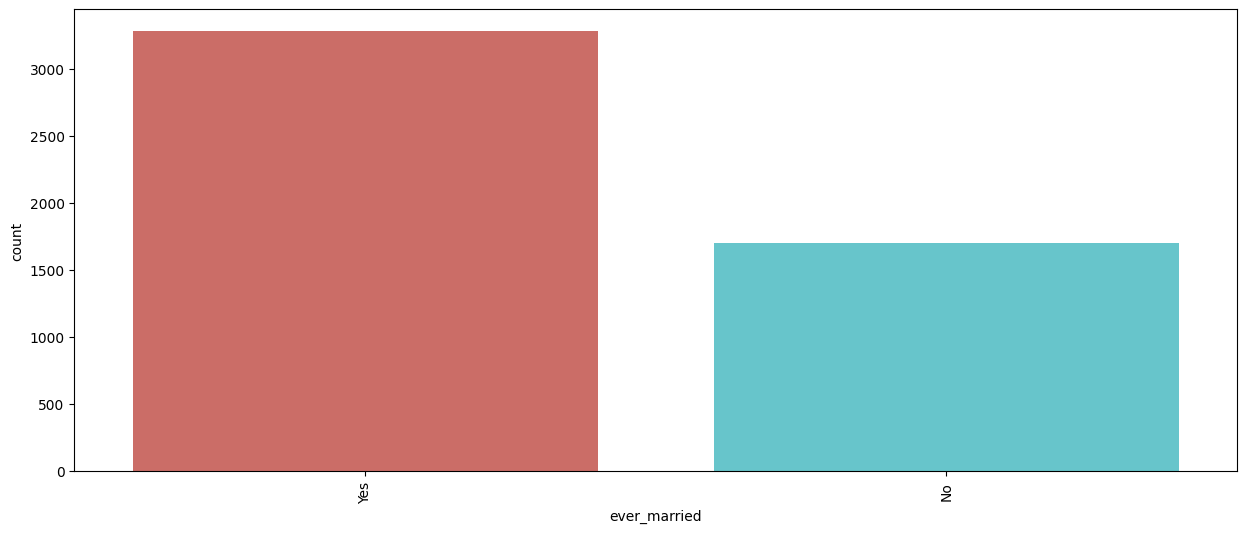

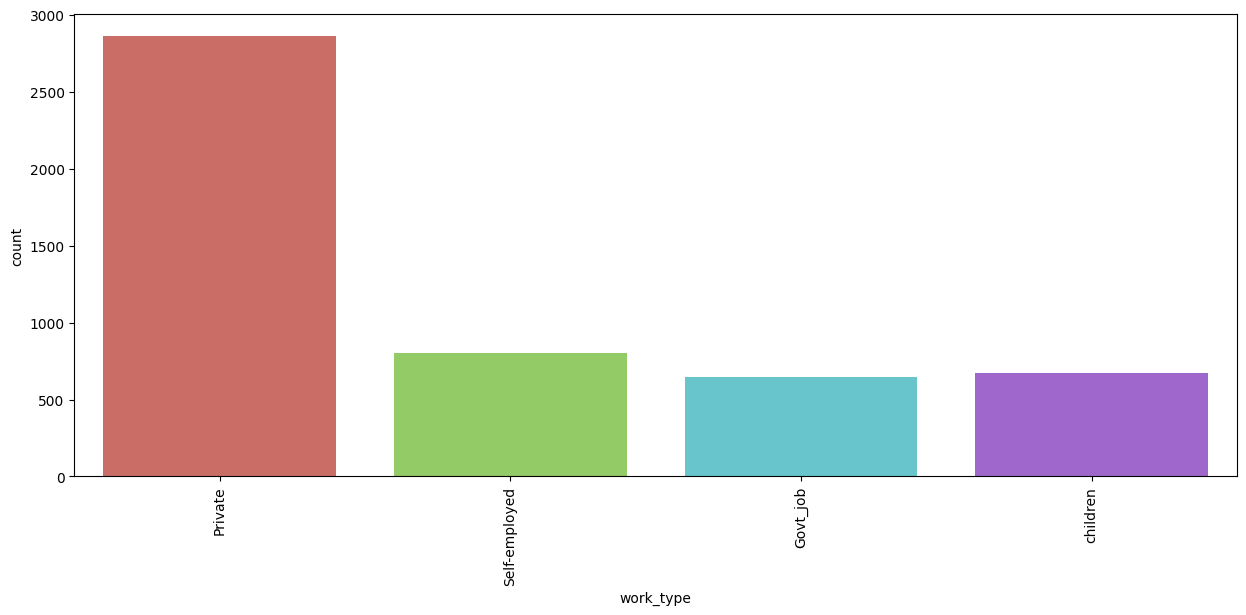

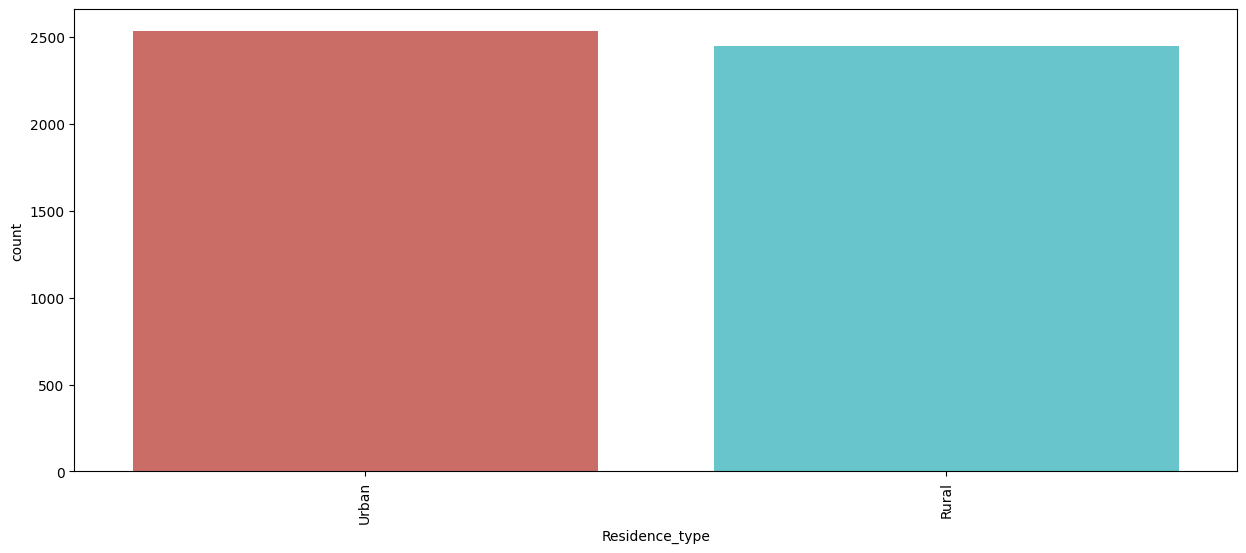

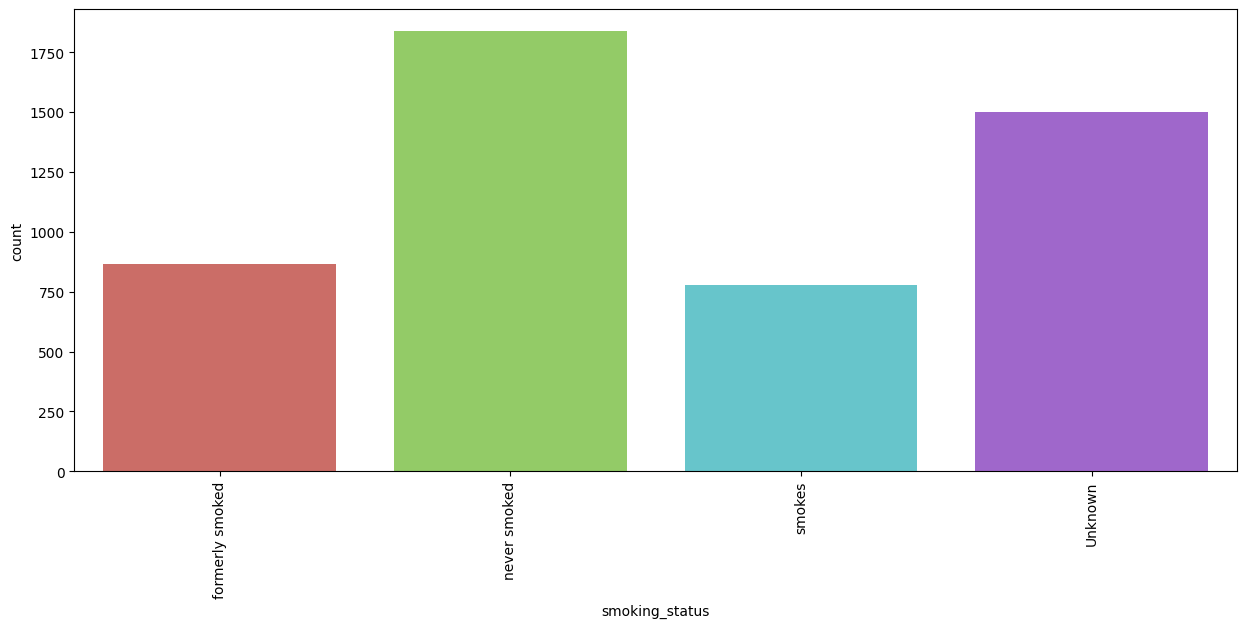

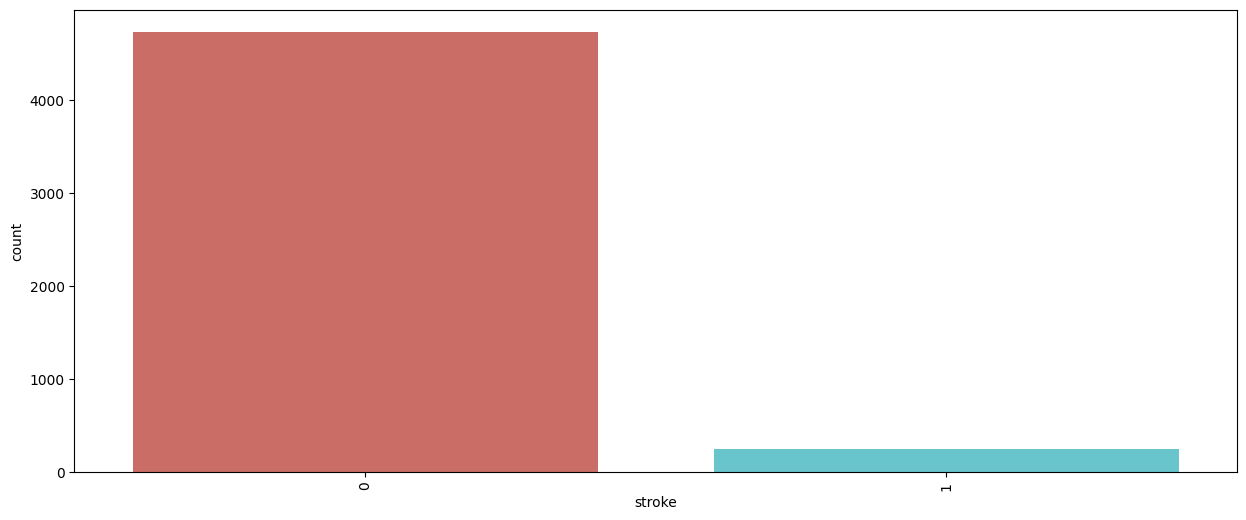

In [15]:
for i in data_cat.columns:
  plt.figure(figsize = (15,6))
  sns.countplot(data_cat[i],data=data_cat,palette='hls')
  plt.xticks(rotation = 90)
  plt.show()

Berdasar visualisasi di atas, dapat diperoleh informasi berupa :
1. dataset memiliki frekuensi jenis kelamin perempuan yang lebih banyak dibandingkan laki-laki
2. dataset memiliki frekuensi penderita hipertensi yang lebih sedikit dibandingkan yang bukan penderita hipertensi
3. dataset memiliki frekuensi bukan penderita heart disease yang lebih banyak dibandingkan yang penderita hipertensi
4. dataset memiliki frekuensi yang pernah menikah lebih banyak daripada yang belum pernah menikah
5. dataset memiliki 4 tipe pekerjaan yang didominasi oleh tipe pekerjaan private
6. dataset memiliki penghuni residence dengan tipe urban dan rural yang hampir seimbang
7. dataset memiliki frekuensi tidak pernah merokok lebih banyak dibandingkan kategori yang lain
8. dataset memiliki lebih banyak yang tidak menderita stroke dibandingkan dengan yang menderita stroke

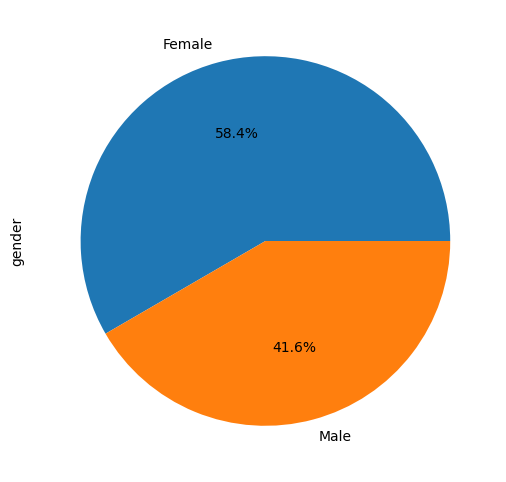

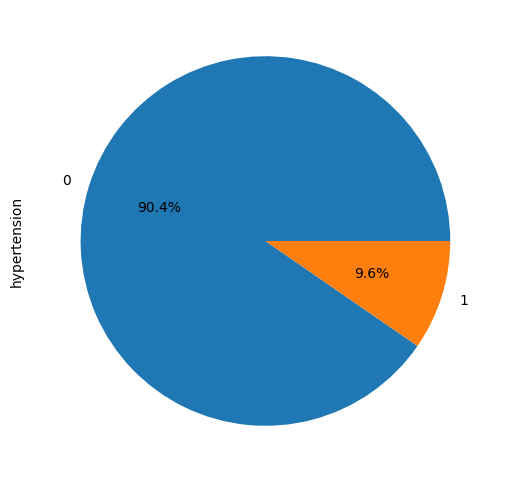

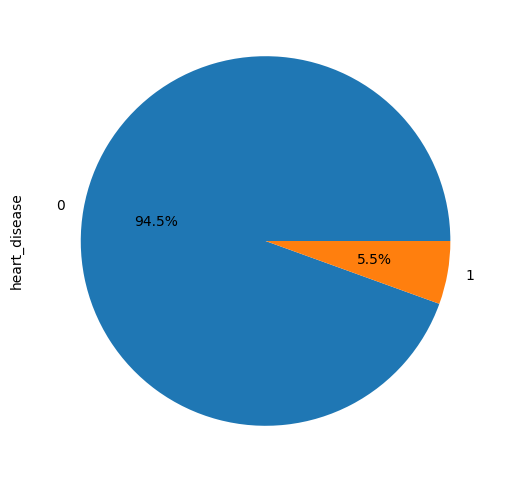

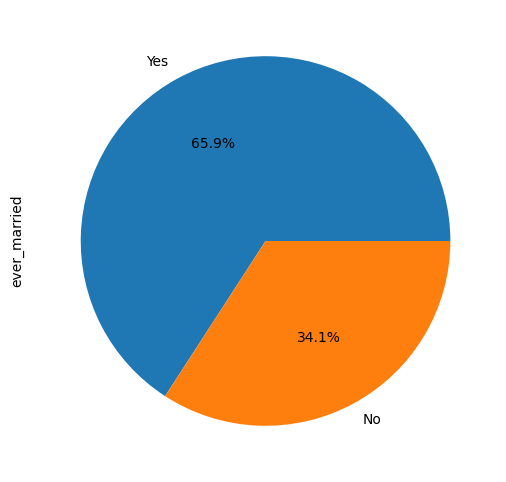

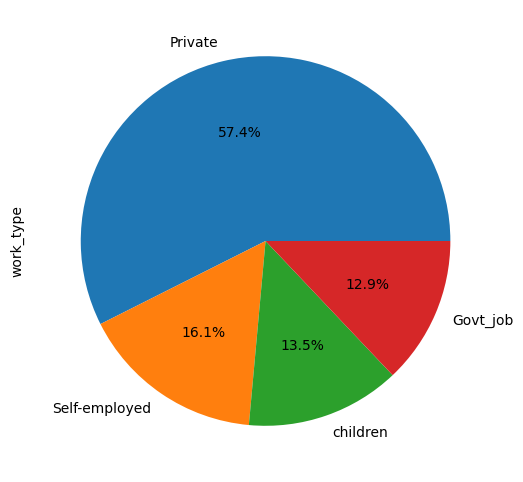

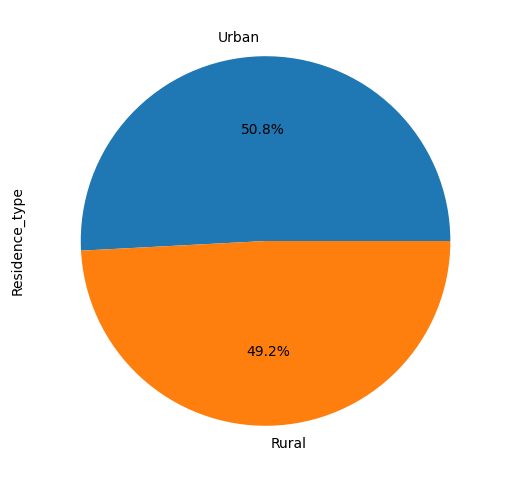

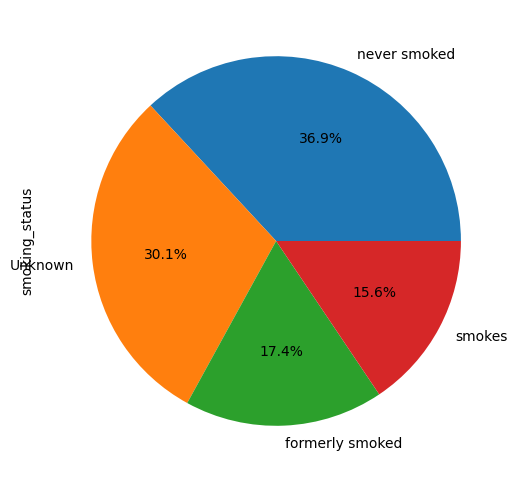

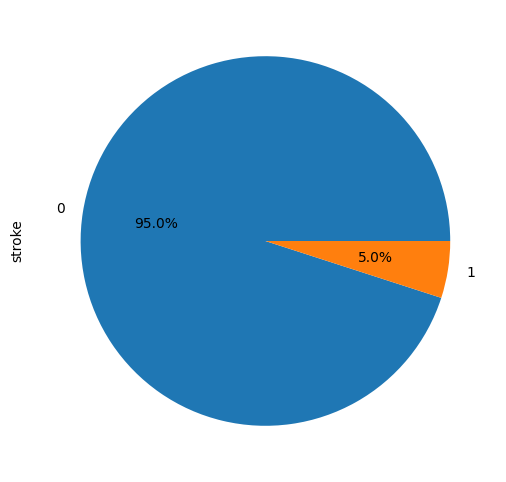

In [16]:
for i in data_cat.columns:
  plt.figure(figsize=(15,6))
  data_cat[i].value_counts().plot(kind='pie',autopct='%1.1f%%')
  plt.xticks(rotation=90)
  plt.show()

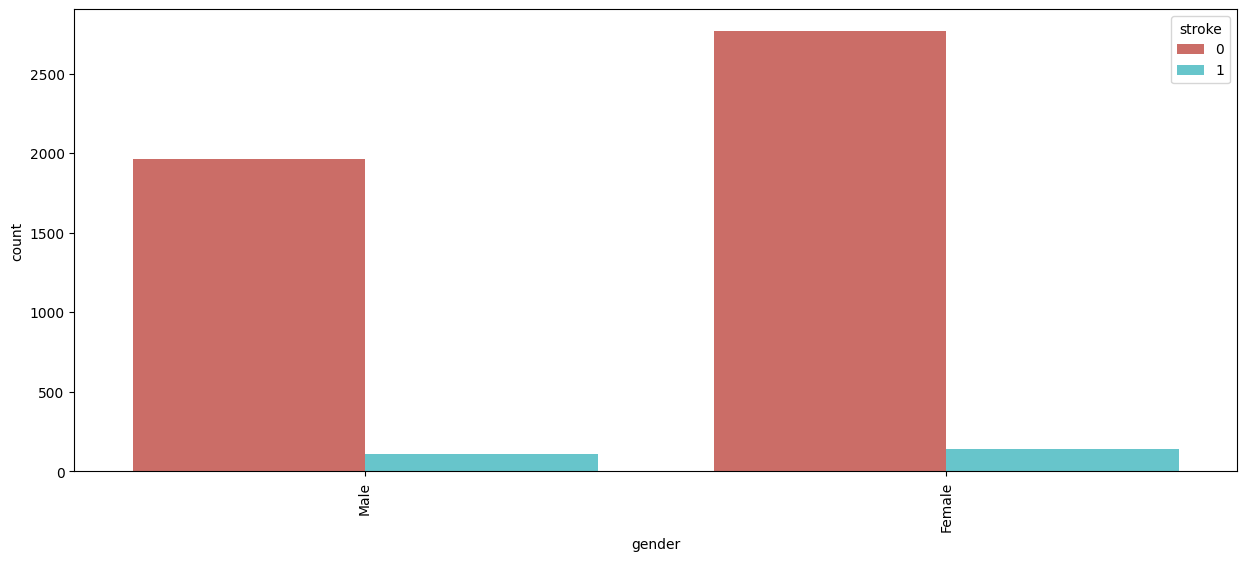

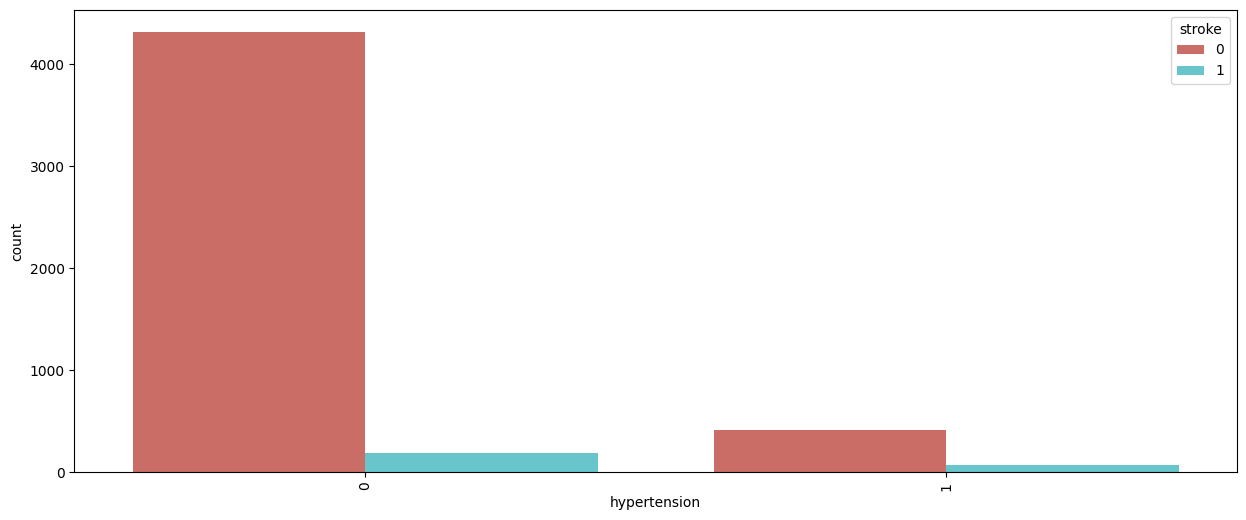

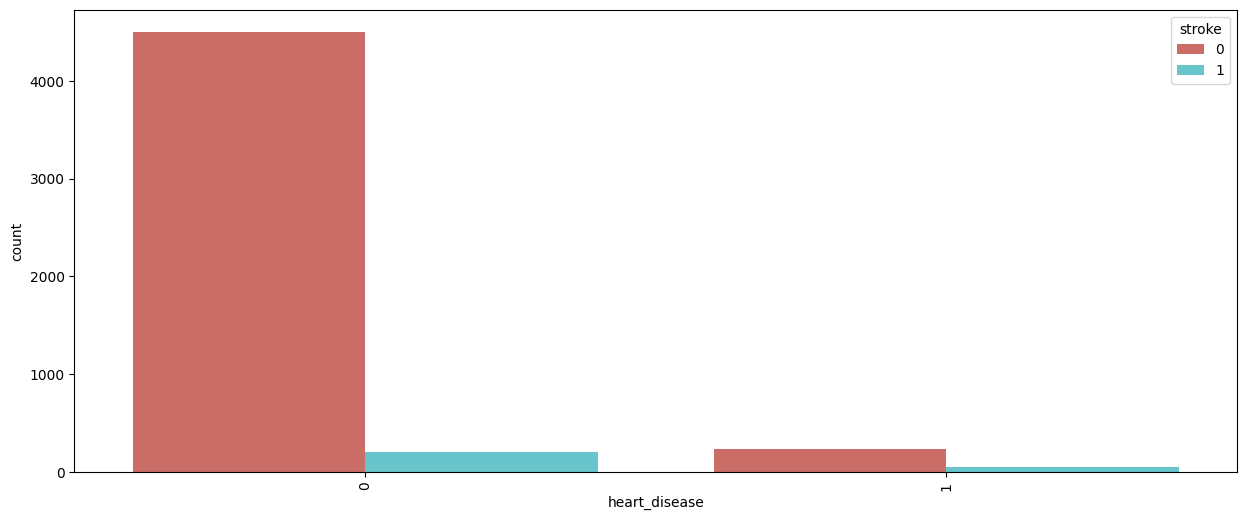

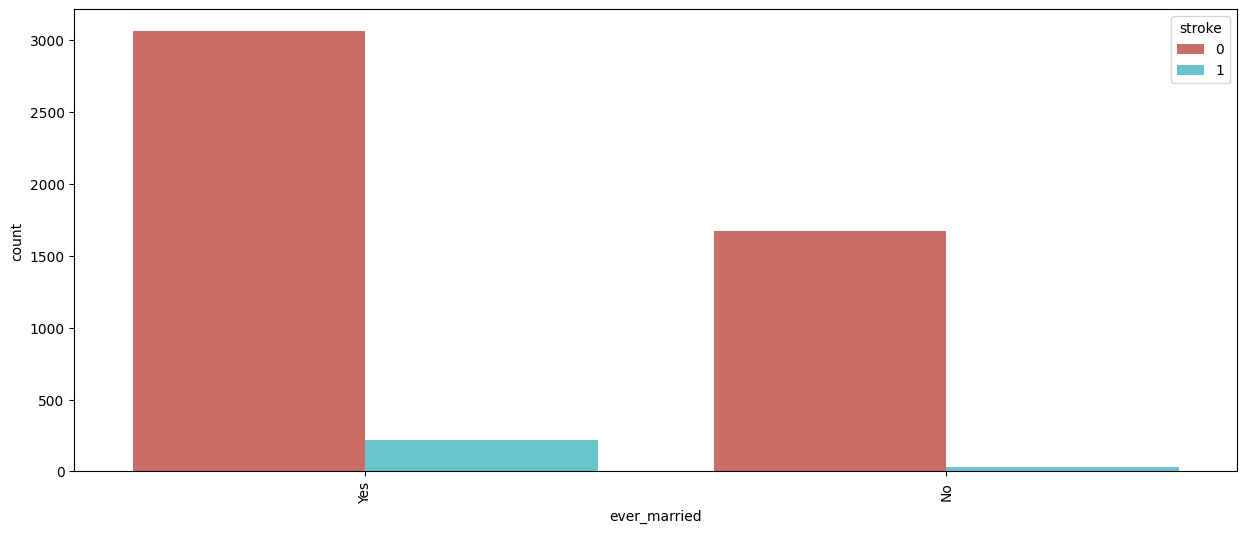

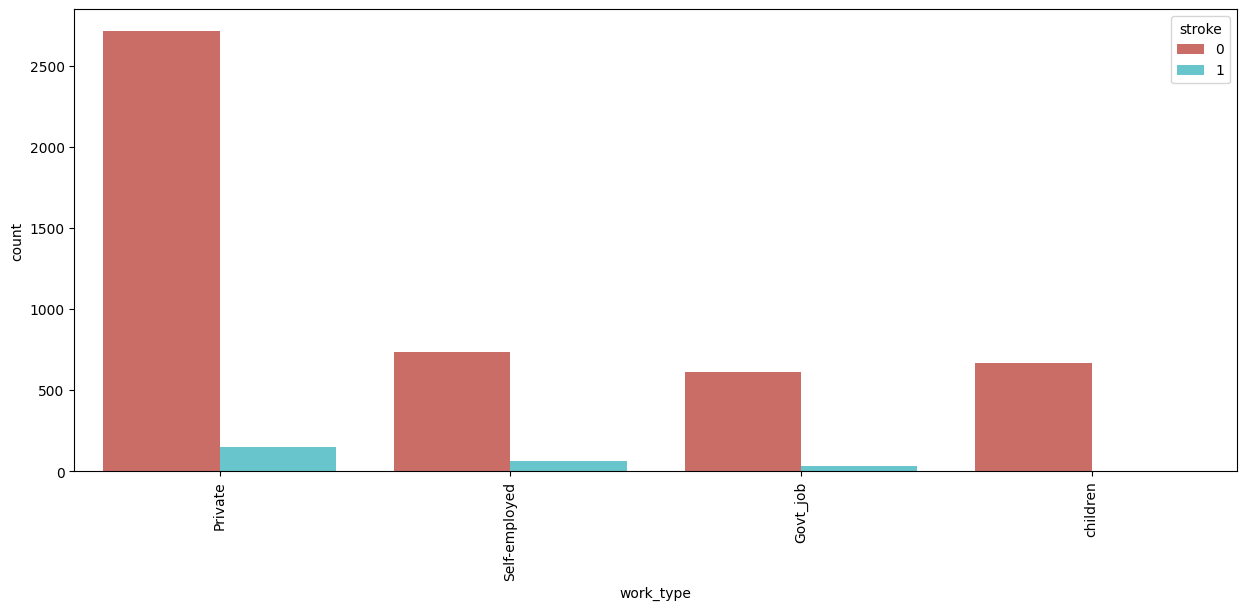

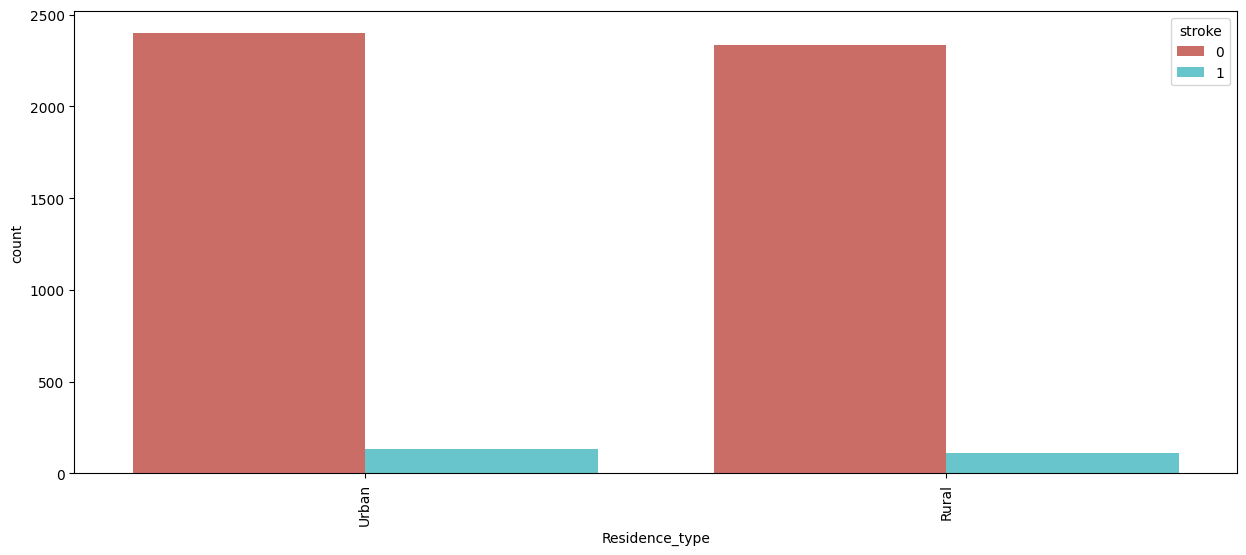

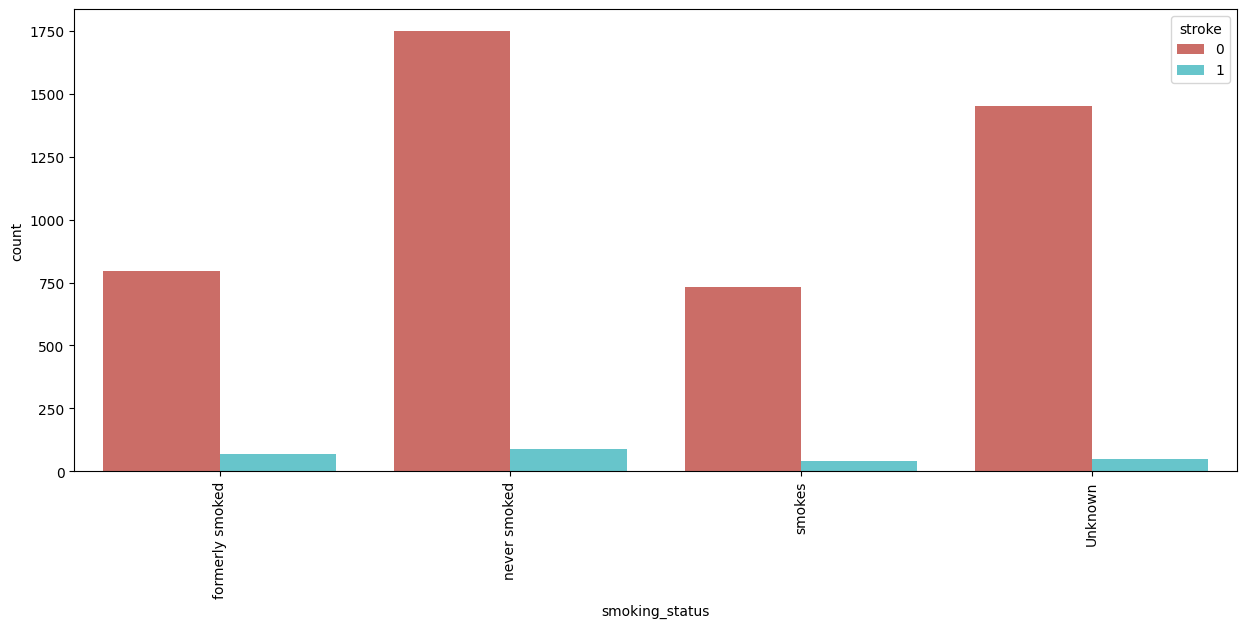

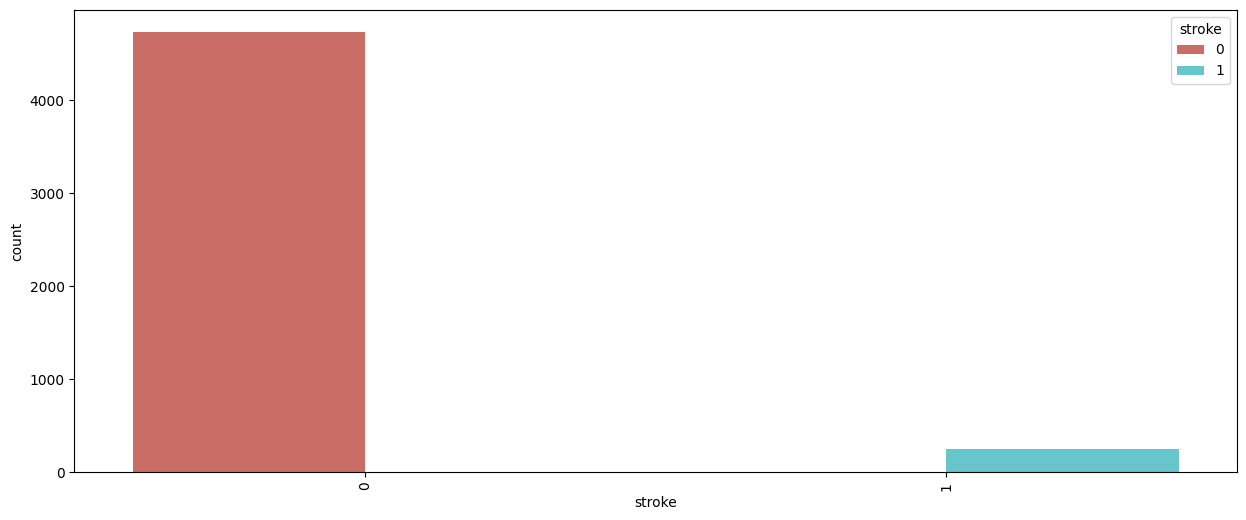

In [17]:
for i in data_cat.columns:
  plt.figure(figsize=(15,6))
  sns.countplot(data_cat[i], data = data_cat, hue='stroke', palette='hls')
  plt.xticks(rotation=90)
  plt.show()

In [18]:
data['ever_married'] = [0 if i !='Yes' else 1 for i in data['ever_married']]

In [19]:
data['gender'] = [0 if i != 'Female' else 1 for i in data['gender']]

In [20]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,67.0,0,1,1,Private,Urban,228.69,36.6,formerly smoked,1
1,0,80.0,0,1,1,Private,Rural,105.92,32.5,never smoked,1
2,1,49.0,0,0,1,Private,Urban,171.23,34.4,smokes,1
3,1,79.0,1,0,1,Self-employed,Rural,174.12,24.0,never smoked,1
4,0,81.0,0,0,1,Private,Urban,186.21,29.0,formerly smoked,1


In [21]:
data = pd.get_dummies(data, columns = ['work_type', 'Residence_type', 'smoking_status'])

In [22]:
data.sample(10)

,gender,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
2667,1,82.0,0,0,1,79.96,27.0,0,0,0,1,0,0,1,0,1,0,0
2682,0,10.0,0,0,0,87.09,14.3,0,0,0,0,1,0,1,1,0,0,0
1166,1,14.0,0,0,0,118.81,24.7,0,0,1,0,0,1,0,1,0,0,0
1147,1,80.0,1,0,1,210.96,31.8,0,0,1,0,0,0,1,0,0,1,0
2037,1,40.0,0,0,1,114.32,28.3,0,1,0,0,0,0,1,0,0,0,1
4633,1,50.0,0,0,1,154.67,33.8,0,0,1,0,0,0,1,0,0,1,0
1904,1,15.0,0,0,0,121.60,22.8,0,0,1,0,0,0,1,0,0,1,0
3120,0,56.0,0,0,1,96.84,30.2,0,0,1,0,0,1,0,1,0,0,0
4818,0,74.0,0,0,1,60.98,28.1,1,0,0,1,0,1,0,0,0,1,0
695,0,33.0,0,0,1,74.88,31.6,0,0,1,0,0,1,0,0,0,0,1


In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [24]:
#Menghapus variabel stroke dari dataset yang masuk sebagai variabel X dan inisialisasi variabel stroke sebagai variabel y
X = data.drop(['stroke'],axis = 1)
y = data['stroke']

In [25]:
#Membagi dataset menjadi data training dan testing dengan rasio 33% data digunakan sebagai data testing. Dengan pemilihan random data sebesar 42.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)
X_train.shape, X_test.shape

((3337, 17), (1644, 17))

# Modelling

In [26]:
#Membuat model random forest dengan banyak tree dalam forest adalah 10 serta untuk mengukur kualitas split menggunakan entropi untuk perolehan infomasi
classifier_rf = RandomForestClassifier(n_estimators=10, criterion="entropy")
classifier_rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [27]:
#Memperoleh nilai y prediksi dari variabel-variabel X data testing
y_pred = classifier_rf.predict(X_test)

# Evaluation

In [28]:
from sklearn.metrics import confusion_matrix

In [29]:
#Menghitung confusion matrix dari y hasil prediksi dan y nilai asli
cm = confusion_matrix(y_test, y_pred)

In [30]:
print(cm)

[[1553    6]
 [  84    1]]


In [31]:
#Menampilkan nilai akurasi untuk prediksi di data training
print('Training-set accuracy score:', classifier_rf.score(X_train, y_train))

Training-set accuracy score: 0.9904105483967636


In [32]:
#Menampilkan nilai akurasi untuk prediksi di data testing
print('Training-set accuracy score:', classifier_rf.score(X_test, y_test))

Training-set accuracy score: 0.9452554744525548


In [33]:
#Proporsi kelas 1 (stroke=yes)
y_train.sum()/y_train.count()

0.048846269103985616

# BALANCING DATA

Class Imbalance adalah situasi yang terjadi ketika salah satu class memiliki jumlah lebih besar dari pada class lainnya. 

Paradoks akurasi adalah kondisi dimana akurasi bukanlah metrik yang baik untuk model prediktif ketika mengklasifikasikan class imbalance.

Salah satu cara penanganannya menggunakan balancing data pada data train. Balancing data bertujuan untuk membuat proporsi kelas mayoritas dan minoritas menjadi seimbang. 

Salah satu teknik yang populer diterapkan dalam rangka menangani ketidak seimbangan kelas adalah SMOTE (Synthetic Minority Over-sampling Technique). Teknik ini mensintesis sampel baru dari kelas minoritas untuk menyeimbangkan dataset dengan cara sampling ulang sampel kelas minoritas

In [34]:
from imblearn.over_sampling import SMOTE
# define oversampling strategy
SMOTE = SMOTE()

# fit and apply the transform
X_train_SMOTE, y_train_SMOTE = SMOTE.fit_resample(X_train, y_train)

In [35]:
# MODEL
#Membuat model random forest dengan banyak tree dalam forest adalah 10 serta untuk mengukur kualitas split menggunakan entropi untuk perolehan infomasi
classifier_rf2 = RandomForestClassifier(n_estimators=10, criterion="entropy")
classifier_rf2.fit(X_train_SMOTE, y_train_SMOTE)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [36]:
#Proporsi kelas 1 (stroke=yes) setelah diSMOTE
y_train_SMOTE.sum()/y_train_SMOTE.count()

0.5

In [37]:
#Memperoleh nilai y prediksi dari variabel-variabel X data testing
y_pred = classifier_rf2.predict(X_test)

In [38]:
#Menghitung confusion matrix dari y hasil prediksi dan y nilai asli
cm = confusion_matrix(y_test, y_pred)
cm

array([[1538,   21],
       [  81,    4]], dtype=int64)

In [39]:
#Menampilkan nilai akurasi untuk prediksi di data training
print('Training-set accuracy score:', classifier_rf2.score(X_train_SMOTE, y_train_SMOTE))
#Menampilkan nilai akurasi untuk prediksi di data testing
print('Training-set accuracy score:', classifier_rf2.score(X_test, y_test))

Training-set accuracy score: 0.9976370510396976
Training-set accuracy score: 0.9379562043795621


## AdaBoost Model

In [40]:
# --- Applying AdaBoost ---
from sklearn.ensemble import AdaBoostClassifier
ABclassifier = AdaBoostClassifier(n_estimators=100)

ABclassifier.fit(X_train_SMOTE, y_train_SMOTE)
y_pred_AB = ABclassifier.predict(X_test)

In [41]:
#Menampilkan nilai akurasi untuk prediksi di data training
print('Training-set accuracy score:', ABclassifier.score(X_train_SMOTE, y_train_SMOTE))
#Menampilkan nilai akurasi untuk prediksi di data testing
print('Training-set accuracy score:', ABclassifier.score(X_test, y_test))

Training-set accuracy score: 0.9584120982986768
Training-set accuracy score: 0.940389294403893


LightGBMClassifier


In [42]:
from imblearn.over_sampling import ADASYN 
X_resampled, y_resampled = ADASYN().fit_resample(X, y)

In [43]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test =train_test_split(X_resampled,y_resampled,train_size=0.7, random_state=42)

In [44]:
from sklearn.model_selection import RandomizedSearchCV
import lightgbm as lgb
params = {
    'learning_rate': [0.05,0.01,0.0001],
    'num_leaves': [90,140,200],
    'boosting_type' : ['gbdt'],
    'objective' : ['binary'],
    'max_depth' : [3,4,5,6,7,8],
    'random_state' : [42], 
    'colsample_bytree' : [0.5,0.6,0.7,0.8,1.0],
    'subsample' : [0.5,0.6,0.7,0.8,1.0],
    'min_split_gain' : [0.01],
    'min_data_in_leaf':[10],
    'metric':['auc']
    }
clf = lgb.LGBMClassifier()
RSCV = RandomizedSearchCV(clf,params,verbose=3,cv=10,n_jobs = -1,n_iter=10)
RSCV.fit(X_train,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10


RandomizedSearchCV(cv=10, estimator=LGBMClassifier(), n_jobs=-1,
                   param_distributions={'boosting_type': ['gbdt'],
                                        'colsample_bytree': [0.5, 0.6, 0.7, 0.8,
                                                             1.0],
                                        'learning_rate': [0.05, 0.01, 0.0001],
                                        'max_depth': [3, 4, 5, 6, 7, 8],
                                        'metric': ['auc'],
                                        'min_data_in_leaf': [10],
                                        'min_split_gain': [0.01],
                                        'num_leaves': [90, 140, 200],
                                        'objective': ['binary'],
                                        'random_state': [42],
                                        'subsample': [0.5, 0.6, 0.7, 0.8, 1.0]},
                   verbose=3)

In [45]:
y_pred=RSCV.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96      1415
           1       0.97      0.94      0.96      1437

    accuracy                           0.96      2852
   macro avg       0.96      0.96      0.96      2852
weighted avg       0.96      0.96      0.96      2852



In [46]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred)

0.9576874180848893

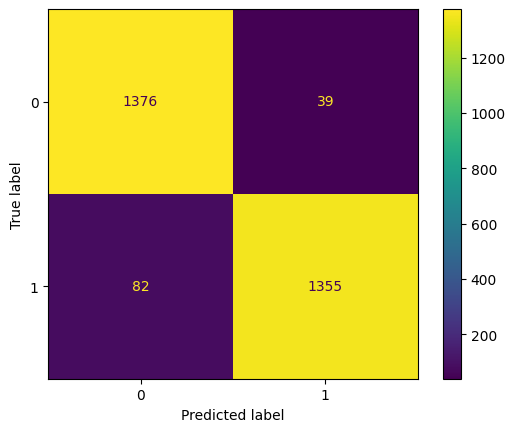

In [47]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(RSCV,X_test,y_test)

In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
param_grid = { 
    'n_estimators': [10, 20, 50],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
rfc=RandomForestClassifier()
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=3,n_jobs=-1,verbose=True)
CV_rfc.fit(X_train, y_train)
y_predict = CV_rfc.predict(X_test)

print(classification_report(y_test, y_predict))

Fitting 3 folds for each of 90 candidates, totalling 270 fits
              precision    recall  f1-score   support

           0       0.93      0.94      0.93      1415
           1       0.94      0.93      0.93      1437

    accuracy                           0.93      2852
   macro avg       0.93      0.93      0.93      2852
weighted avg       0.93      0.93      0.93      2852



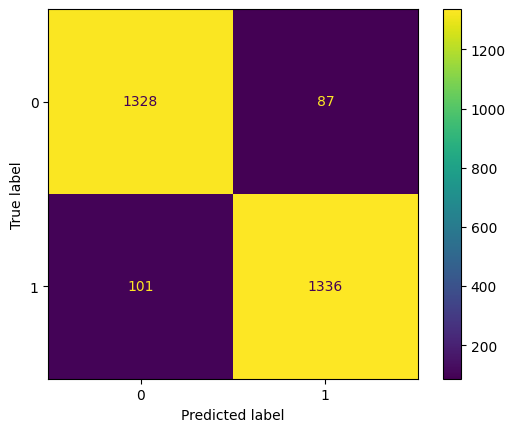

In [49]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(CV_rfc,X_test,y_test)

Xgboost & Random Forest

In [50]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
xgb = XGBClassifier(learning_rate=0.05,n_estimators=10,seed=20,reg_alpha=5,eval_metric='auc',tree_method='hist',
                    objective='binary:logistic',
                    silent=True, nthread=1)
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }
folds = 3
param_comb = 5

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 20)

random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=param_comb, scoring='roc_auc', n_jobs=4, cv=skf.split(X_train,y_train), verbose=3, random_state=1001 )
random_search.fit(X_train, y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[16:34:20] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




RandomizedSearchCV(cv=<generator object _BaseKFold.split at 0x0000017AD11869E0>,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='auc', gamma=None,
                                           gpu_id=None, grow_policy=None,
                                           importance_type=None,
                                           interact...
                                           monotone_constraints=None,
                                           n_estimators=10, n_jobs=None,
                                           nthread=1, num_parallel_tree=None,
                                           predictor=None, random_state=None,
                                           reg_alpha=5, ...),
                   n_iter=5, n_jobs=4,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'gamma': [0.5, 1, 1.5, 2, 5],
                                        'max_depth': [3, 4, 5],
                                        'min_child_weight': [1, 5, 10],
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=1001, scoring='roc_auc', verbose=3)

              precision    recall  f1-score   support

           0       0.90      0.93      0.92      1415
           1       0.93      0.90      0.92      1437

    accuracy                           0.92      2852
   macro avg       0.92      0.92      0.92      2852
weighted avg       0.92      0.92      0.92      2852



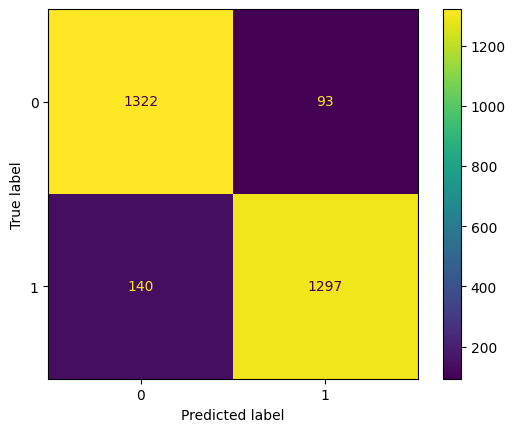

In [51]:
from sklearn.ensemble import RandomForestClassifier

y_predict = random_search.predict(X_test)

print(classification_report(y_test, y_predict))

plot_confusion_matrix(random_search,X_test,y_test)

Kesimpulan 

1. n_estimator berpengaruh kepada accuracy_test semakin besar n_esstimator semakin baik accuracy_test nya
2. Data tergolong sudah stabil